### Name : Nour Abu Baider
### ID : 166542

# Spam Classification Project

This project uses a Random Forest classifier to predict whether an email is spam based on various features.

## Installation and Requirements

1. Importing and Installing the required packages.
2. Loading, reading and preparing the data for model training. 


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [48]:
# Load and Read the training data

train_data_path = "spambase_train.csv"
test_data_path = "spambase_test.csv"
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [50]:
# Prepare train and test data


xtrain = train_data.drop(['spam', 'ID'], axis=1).copy()
ytrain = train_data['spam'].copy()
testID = test_data['ID'].copy()
xtest = test_data.drop(['ID'], axis=1).copy()

# Data Preprocessing

splitting and preprocesses the data for modling training

In [53]:
# Split the training data

X_train, X_val, y_train, y_val = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)

In [55]:
#Preprocessing: Scale the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
xtest_scaled = scaler.transform(xtest)

In [57]:
# Hyperparameter tuning using Grid Search


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Model Training

trainning the modle using a Random Forest model on the preprocessed data.

In [60]:
# Train the model

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)


best_model = grid_search.best_estimator_


Fitting 3 folds for each of 216 candidates, totalling 648 fits


# Validation and Prediction

Validate the model and make Prediction on the actual test data

In [62]:
# Validate the model

ypred_val = best_model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, ypred_val)
print("Accuracy:", accuracy)

Accuracy: 0.9611801242236024


In [64]:
# Predict on the actual test data

ypred_test = best_model.predict(xtest_scaled)

# Scatter Plot
 
 I used scatter plot to Visualize the relationship between featuers and the target variable ('spam').
 
I chosed " word_freq_free " and " char_freq_$ " 

because of the frequency of the word "free" is a strong indicator of spam, as many spam emails offer free products or services.
and the frequency of the dollar sign character is indicative of spam, as spam emails often mention money or financial transactions.


" word_freq_free "  on the x-axis and " char_freq_$ "  on the y-axis, coloring the points based on whether they are spam or not

In [67]:
print(train_data.columns)

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


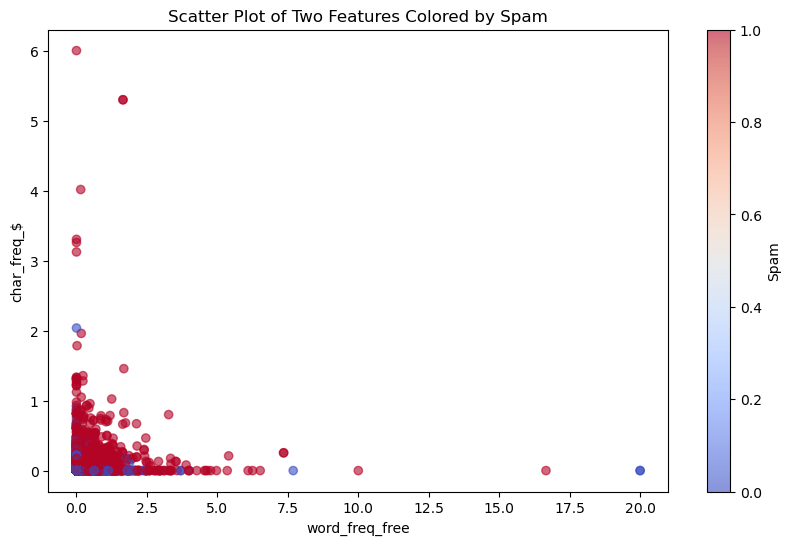

In [69]:
# Scatter Plot

feature1 = 'word_freq_free'  # frequency of the word "free"
feature2 = 'char_freq_$'  # frequency of the dollar sign character

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train_data[feature1], train_data[feature2], c=train_data['spam'], cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Spam')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter Plot of Two Features Colored by Spam')
plt.show()

# Submission and Handling.


Submission file and Handling the null values (if found)






In [72]:
# Prepare the submission

sub = pd.DataFrame({'ID': testID, 'spam': ypred_test})

In [74]:
# Handle null IDs (if any)

null_id_mask = sub['ID'].isnull()
new_ids = range(len(sub) + 1, len(sub) + 1 + null_id_mask.sum())
sub.loc[null_id_mask, 'ID'] = new_ids

In [76]:
# Save the submission to a CSV file

csv_file = 'numnum.csv'
sub.to_csv(csv_file, index=False)